# INTRODCUTION

**Sales Prediction for Big Mart Outlets**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.


Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.


Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

**Data Dictionary**
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

**Train file**: CSV containing the item outlet information with sales value

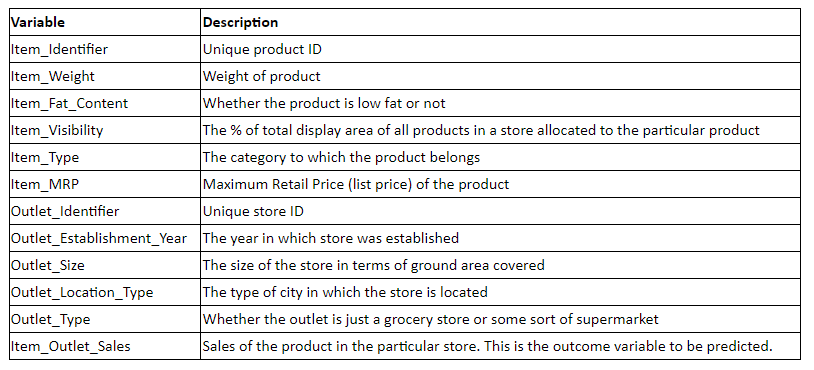


**Test file:** CSV containing item outlet combinations for which sales need to be forecasted
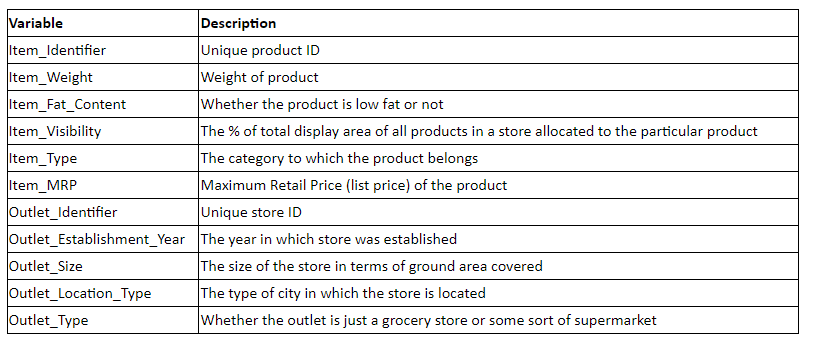

**Submission file format**

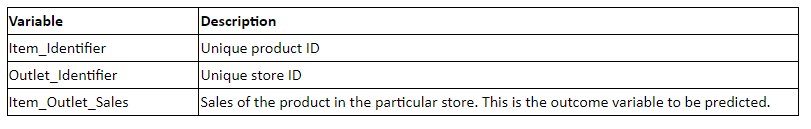

**Evaluation Metric**

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in sample submission.


We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.

**Public and Private Split**

Test file is further divided into Public (25%) and Private (75%)


Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

**Guidelines for Final Submission**

Please ensure that your final submission includes the following:




1.   Solution file containing the predicted sales value in the test dataset (format is given in sample submission csv)
2.   Code file for reproducing the submission, note that it is mandatory to submit your code for a valid final submission




## GETTING DATA

In [ ]:
# To download Train data
import requests
file_url="https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv"
    
r = requests.get(file_url, stream = True)
 
with open("/content/train.csv", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
        if block:
            file.write(block)

In [ ]:
# To download Test data
import requests
file_url="https://datahack-prod.s3.amazonaws.com/test_file/test_AbJTz2l.csv"
    
r = requests.get(file_url, stream = True)
 
with open("/content/test.csv", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
        if block:
            file.write(block)

In [ ]:
# To download Sample Submission file
import requests
file_url="https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_8RXa3c6.csv"
    
r = requests.get(file_url, stream = True)
 
with open("/content/sample_submission.csv", "wb") as file:
    for block in r.iter_content(chunk_size = 1024):
        if block:
            file.write(block)

## BASIC CODING

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
train_original=train_data.copy()
test_original=test_data.copy()

In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
train_data.shape


(8523, 12)

In [ ]:
test_data.shape

(5681, 11)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [ ]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

## EDA PROCESS

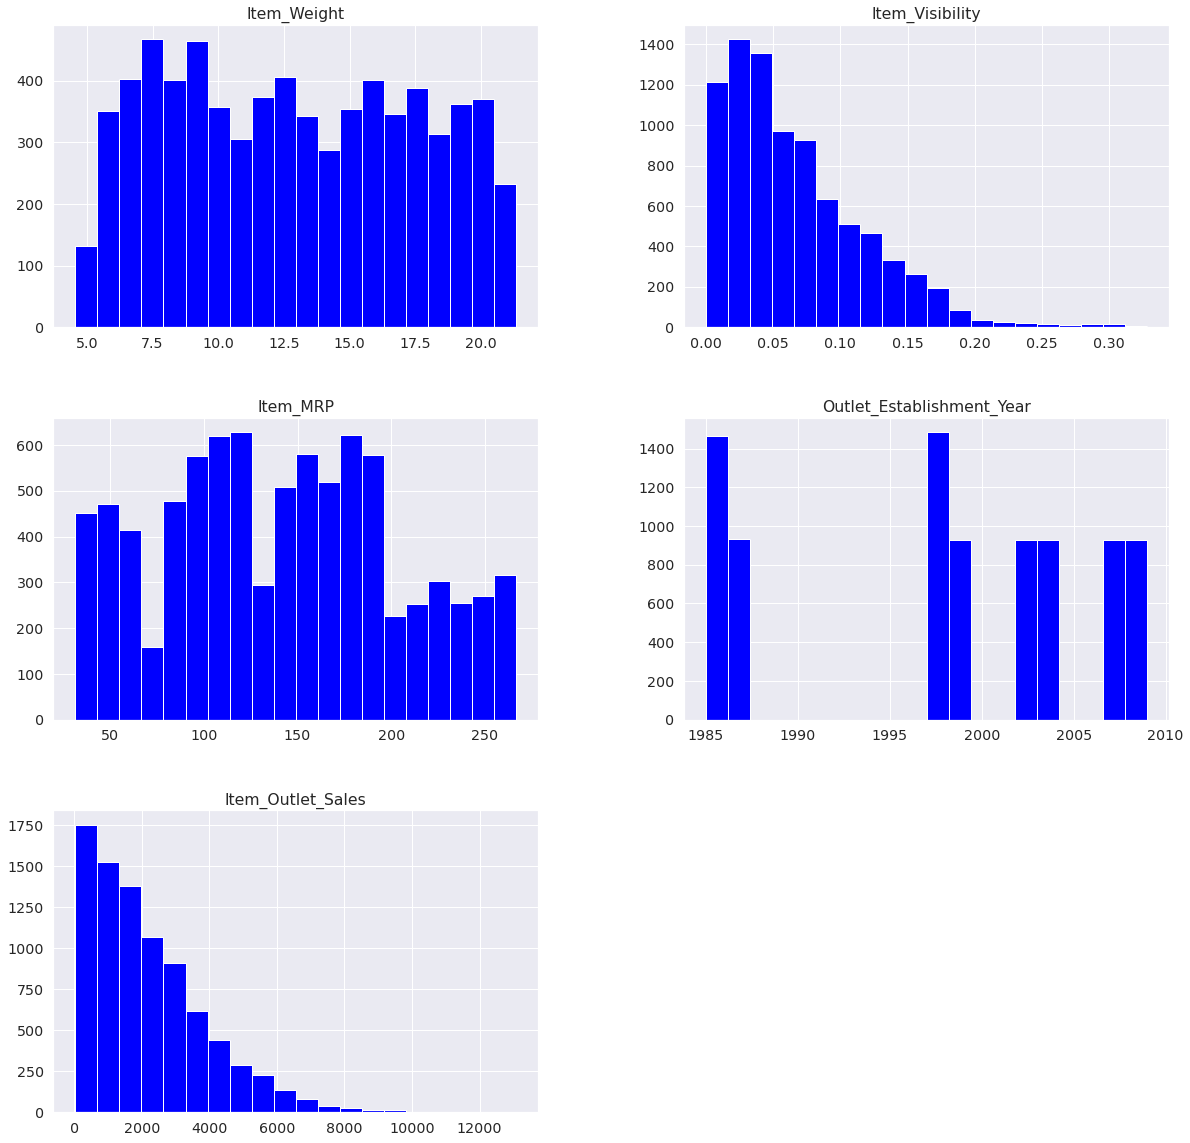

In [ ]:
sns.set(font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=train_data.hist(bins=20,color='blue' )

Correlation Heat map of the data


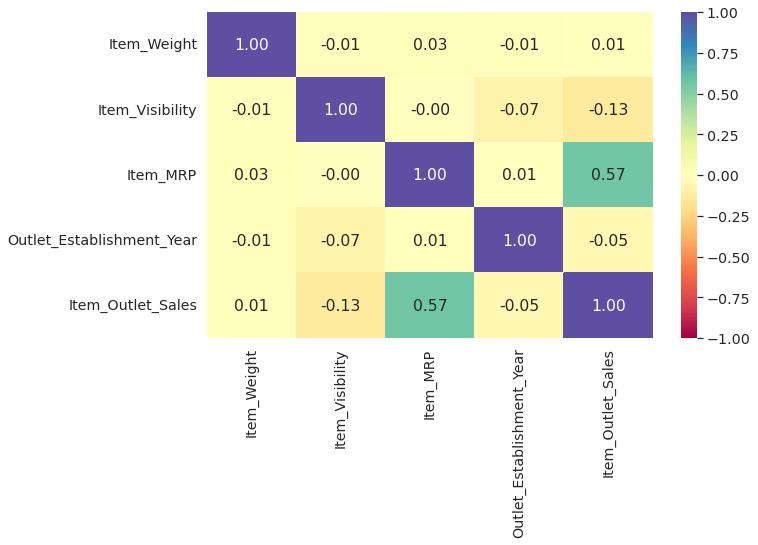

In [ ]:
# correlation
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()


In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# FILLING MISSING VALUES

In [ ]:
#filling null values

train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)

# filling the missing values with the mean as there is no outliers present 
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)

# Since its a categorical the mode value is taken
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0], inplace=True)

In [ ]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#ABHIJITH B
test_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
test_data.shape

(5681, 11)

# CHECKING OUTLIERS

In [ ]:

#Checking outliers of numerical featues

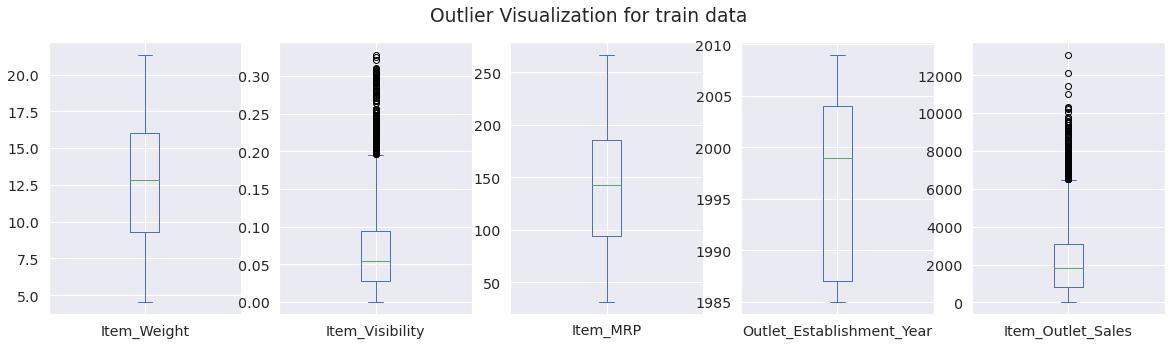

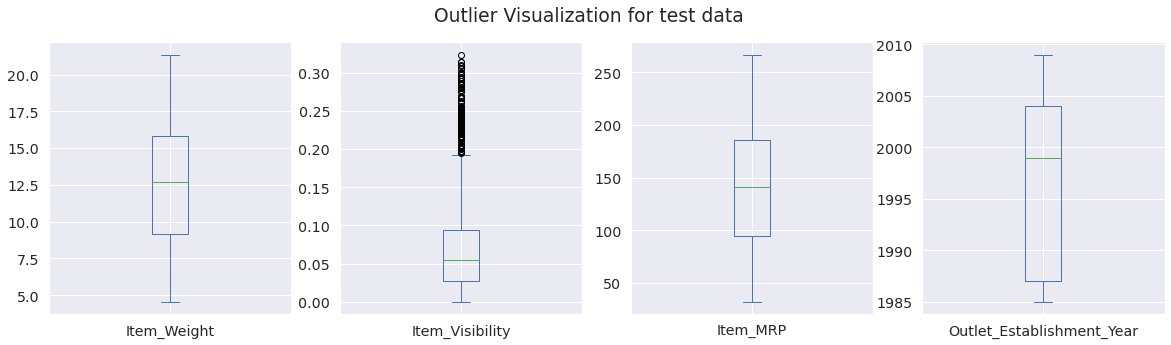

In [ ]:
train_data.plot(kind='box',subplots=True,figsize=(20,5),title='Outlier Visualization for train data')
plt.show()
test_data.plot(kind='box',subplots=True,figsize=(20,5),title='Outlier Visualization for test data')
plt.show()

In [ ]:
#Item_Visibility and Item_Outlet_Sales has outliers which are to be removed by IQR method

In [ ]:

#Removing outliers in Item_Visibility by IQR method
#train data
Q1_train=np.percentile(train_data['Item_Visibility'],25,interpolation='midpoint')
Q2_train=np.percentile(train_data['Item_Visibility'],50,interpolation='midpoint')   
Q3_train=np.percentile(train_data['Item_Visibility'],75,interpolation='midpoint')
print(Q1_train)
print(Q2_train)
print(Q3_train) 

#finding IQR
IQR_train=Q3_train-Q1_train
low_lim_train=Q1_train-1.5*IQR_train
up_lim_train=Q3_train+1.5*IQR_train
print(low_lim_train)          
print(up_lim_train)

0.0269894775
0.053930934
0.0945852925
-0.07440424500000001
0.195979015


In [ ]:
#test data
Q1_test=np.percentile(test_data['Item_Visibility'],25,interpolation='midpoint')
Q2_test=np.percentile(test_data['Item_Visibility'],50,interpolation='midpoint')   
Q3_test=np.percentile(test_data['Item_Visibility'],75,interpolation='midpoint')
print(Q1_test)
print(Q2_test)
print(Q3_test) 

#finding IQR
IQR_test=Q3_test-Q1_test
low_lim_test=Q1_test-1.5*IQR_test
up_lim_test=Q3_test+1.5*IQR_test
print(low_lim_test)          
print(up_lim_test)

0.027046875
0.054154252
0.093462623
-0.072576747
0.193086245


In [ ]:
#storing outlier using for loop
outlier_train=[]
for x in train_data['Item_Visibility']:
    if((x>up_lim_train)or(x<low_lim_train)):
        outlier_train.append(x)
        
len(outlier_train)

144

In [ ]:
#storing outlier using for loop
outlier_test=[]
for x in test_data['Item_Visibility']:
    if((x>up_lim_test)or(x<low_lim_test)):
        outlier_test.append(x)
        
len(outlier_test)

113

In [ ]:

# #Removing the outliers in train
# ind_train=train_data['Item_Visibility']>up_lim_train
# train_data.loc[ind_train].index
# train_data.drop(train_data.loc[ind_train].index,inplace=True)
# plt.boxplot(train_data['Item_Visibility'])
# plt.title('Box plot of Item_Visibility of train data')

# Pre-Processing 

In [ ]:
print(test_data.shape, train_data.shape)

(5681, 11) (8523, 12)


In [ ]:
print (train_data.nunique(),"\n\n",test_data.nunique())

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64 

 Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64


In [ ]:
categorial_features = train_data.select_dtypes(include=[np.object_])
numerical_features = train_data.select_dtypes(include=[np.number])

In [ ]:
test_data.shape

(5681, 11)

In [ ]:

for col in categorial_features:
    print('\n%s column: '%col)
    print(train_data[col].unique())


Item_Identifier column: 
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content column: 
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type column: 
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier column: 
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size column: 
['Medium' 'High' 'Small']

Outlet_Location_Type column: 
['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type column: 
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
#ABHIJITH B
item_fat_contents = {'Low Fat':'low', 'Regular':'regular', 'LF':'low', 'reg':'regular','low fat':'low'}

train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map(item_fat_contents)
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map(item_fat_contents)
print(train_data['Item_Fat_Content'].unique())


['low' 'regular']


In [ ]:
print(train_data['Item_Fat_Content'].value_counts())

low        5517
regular    3006
Name: Item_Fat_Content, dtype: int64


In [ ]:
test_data['Item_Fat_Content'].value_counts()

low        3668
regular    2013
Name: Item_Fat_Content, dtype: int64

In [ ]:
for col in categorial_features:
    print('\n%s column: '%col)
    print(train_data[col].value_counts())


Item_Identifier column: 
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content column: 
low        5517
regular    3006
Name: Item_Fat_Content, dtype: int64

Item_Type column: 
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier column: 
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    52

# Feature Engineering

In [ ]:
print(train_data.shape,"\n",test_data.shape)

(8523, 12) 
 (5681, 11)


In [ ]:
print(train_data.columns,"\n",test_data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object') 
 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
train_data["Outlet_Type"] = ord_enc.fit_transform(train_data[["Outlet_Type"]])
train_data['Outlet_Location_Type'] =ord_enc.fit_transform(train_data[["Outlet_Location_Type"]])
train_data['Outlet_Size'] =ord_enc.fit_transform(train_data[["Outlet_Size"]])
train_data['Item_Fat_Content'] =ord_enc.fit_transform(train_data[["Item_Fat_Content"]])
train_data['Item_Type'] =ord_enc.fit_transform(train_data[["Item_Type"]])

In [ ]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0.0,0.016047,4.0,249.8092,OUT049,1999,1.0,0.0,1.0,3735.1380
1,DRC01,5.92,1.0,0.019278,14.0,48.2692,OUT018,2009,1.0,2.0,2.0,443.4228
2,FDN15,17.50,0.0,0.016760,10.0,141.6180,OUT049,1999,1.0,0.0,1.0,2097.2700
3,FDX07,19.20,1.0,0.000000,6.0,182.0950,OUT010,1998,1.0,2.0,0.0,732.3800
4,NCD19,8.93,0.0,0.000000,9.0,53.8614,OUT013,1987,0.0,2.0,1.0,994.7052


In [ ]:
train_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)


In [ ]:
train_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.0,0.016047,4.0,249.8092,1.0,0.0,1.0,3735.1380
1,5.92,1.0,0.019278,14.0,48.2692,1.0,2.0,2.0,443.4228
2,17.50,0.0,0.016760,10.0,141.6180,1.0,0.0,1.0,2097.2700
3,19.20,1.0,0.000000,6.0,182.0950,1.0,2.0,0.0,732.3800
4,8.93,0.0,0.000000,9.0,53.8614,0.0,2.0,1.0,994.7052


In [ ]:
train_data.shape

(8523, 9)

In [ ]:
test_data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
test_data["Outlet_Type"] = ord_enc.fit_transform(test_data[["Outlet_Type"]])
test_data['Outlet_Location_Type'] =ord_enc.fit_transform(test_data[["Outlet_Location_Type"]])
test_data['Outlet_Size'] =ord_enc.fit_transform(test_data[["Outlet_Size"]])
test_data['Item_Fat_Content'] =ord_enc.fit_transform(test_data[["Item_Fat_Content"]])
test_data['Item_Type'] =ord_enc.fit_transform(test_data[["Item_Type"]])

In [ ]:
test_data.shape

(5681, 8)

In [ ]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0.0,0.007565,13.0,107.8622,1.0,0.0,1.0
1,8.300000,1.0,0.038428,4.0,87.3198,1.0,1.0,1.0
2,14.600000,0.0,0.099575,11.0,241.7538,1.0,2.0,0.0
3,7.315000,0.0,0.015388,13.0,155.0340,1.0,1.0,1.0
4,12.695633,1.0,0.118599,4.0,234.2300,1.0,2.0,3.0


In [ ]:
x=train_data.drop("Item_Outlet_Sales",axis=1)
y=train_data["Item_Outlet_Sales"]

# Modelling

Since it is a Regression problem I use  Linear Regression


In [ ]:
x.shape

(8523, 8)

In [ ]:
y.shape

(8523,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x,y,random_state = 42, test_size = 0.2)

In [ ]:
print(x_train.shape,x_valid.shape,y_train.shape,y_valid.shape)

(6818, 8) (1705, 8) (6818,) (1705,)


In [ ]:
# Logistic Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_valid)
mean_squared_error_value=mean_squared_error(y_valid,y_pred1)
print(mean_squared_error_value)
R2_value=r2_score(y_valid,y_pred1)
print(R2_value)

1415448.8692930061
0.5001637293317924


In [ ]:
pred_test =lr.predict(test)

In [ ]:
pred_test.shape

(5681,)

In [ ]:
pred_test 

array([2067.70421883, 1286.1053025 , 2233.76063434, ..., 1712.77892443,
       3347.95257689, 1090.28172342])

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['Item_Outlet_Sales'] = pred_test
submission['Item_Identifier']= test_original['Item_Identifier']

In [ ]:
submission.to_csv('submission1.csv',index=False)
